In [17]:
import pandas as pd

# Define multipliers for each factor
legendary_rates = [0.02, 0.03]
weather_boosted_rates = [0.5974, 0.667934]
ball_multipliers = [1, 1.5, 2, -1]
berry_multipliers = [1, 1.5, 1.8, 2.5]
throw_multipliers = [1, 1.15, 1.5, 1.85]
medal_multipliers = [1, 1.1, 1.2, 1.3, 1.4]
curve_ball_multiplier = [1, 1.7]

# Define default values
default_legendary = 0.02
default_weather = 0.5974
default_berry = 2.5
default_throw = 1.5
default_medal = 1.2
default_curve = 1.7
default_ball = -1

# Initialize the result table
columns = ["Multiplier Combination", "Number of Balls", "Hidden Multiplier", "Individual Catch Rate",
           "Cumulative Catch Rate", "Odds to Not Catch"]

# Store results
results = []

In [18]:
def calculate_catch_rates(legendary, berry, throw, medal, curve, ball, weather_boost, parameter_name):
    for ball_num in range(1, 21):
        combination_label = f"Varying {parameter_name}: {eval(parameter_name)}"

        # Calculate m (multiplier)
        if ball == -1:
            ball_multiplier = 1.05 ** ball_num
        else:
            ball_multiplier = ball

        m = ball_multiplier * berry * curve * medal * throw

        # Calculate individual catch rate using the formula:
        # P = 1 - (1 - (legendary_rate/(2×weather_boost)))^m
        base_rate = legendary / (2 * weather_boost)
        individual_catch_rate = 1 - (1 - base_rate) ** m

        individual_catch_rate = min(individual_catch_rate, 1)
        odds_to_not_catch = 1 - individual_catch_rate

        # Calculate cumulative rate
        cumulative_rate = 1 - (odds_to_not_catch ** ball_num)

        results.append([
            combination_label, ball_num, individual_catch_rate,
            cumulative_rate, odds_to_not_catch
        ])

In [19]:
# Test each parameter variation while keeping others at default
# Legendary rates
for legendary in legendary_rates:
    calculate_catch_rates(legendary, default_berry, default_throw, default_medal, default_curve, default_ball, default_weather, 'legendary')

# Berry multipliers
for berry in berry_multipliers:
    calculate_catch_rates(default_legendary, berry, default_throw, default_medal, default_curve, default_ball, default_weather, 'berry')

# Throw multipliers
for throw in throw_multipliers:
    calculate_catch_rates(default_legendary, default_berry, throw, default_medal, default_curve, default_ball, default_weather, 'throw')

# Medal multipliers
for medal in medal_multipliers:
    calculate_catch_rates(default_legendary, default_berry, default_throw, medal, default_curve, default_ball, default_weather, 'medal')

# Curve ball multipliers
for curve in curve_ball_multiplier:
    calculate_catch_rates(default_legendary, default_berry, default_throw, default_medal, curve, default_ball, default_weather, 'curve')

# Ball multipliers
for ball in ball_multipliers:
    calculate_catch_rates(default_legendary, default_berry, default_throw, default_medal, default_curve, ball, default_weather, 'ball')

# Ball multipliers
for weather in weather_boosted_rates:
    calculate_catch_rates(default_legendary, default_berry, default_throw, default_medal, default_curve, default_ball, weather, 'weather')


# Create DataFrame with updated columns
columns = ["Parameter", "Number of Balls", "Individual Catch Rate",
           "Cumulative Catch Rate", "Odds to Not Catch"]
catch_rate_df = pd.DataFrame(results, columns=columns)

# Save and display results
catch_rate_df.to_csv("pokemon_go_catch_rate_analysis_by_parameter.csv", index=False)
print(catch_rate_df.head())

                 Parameter  Number of Balls  Individual Catch Rate  \
0  Varying legendary: 0.02                1               0.126804   
1  Varying legendary: 0.02                2               0.132704   
2  Varying legendary: 0.02                3               0.138857   
3  Varying legendary: 0.02                4               0.145269   
4  Varying legendary: 0.02                5               0.151951   

   Cumulative Catch Rate  Odds to Not Catch  
0               0.126804           0.873196  
1               0.247798           0.867296  
2               0.361404           0.861143  
3               0.466276           0.854731  
4               0.561365           0.848049  


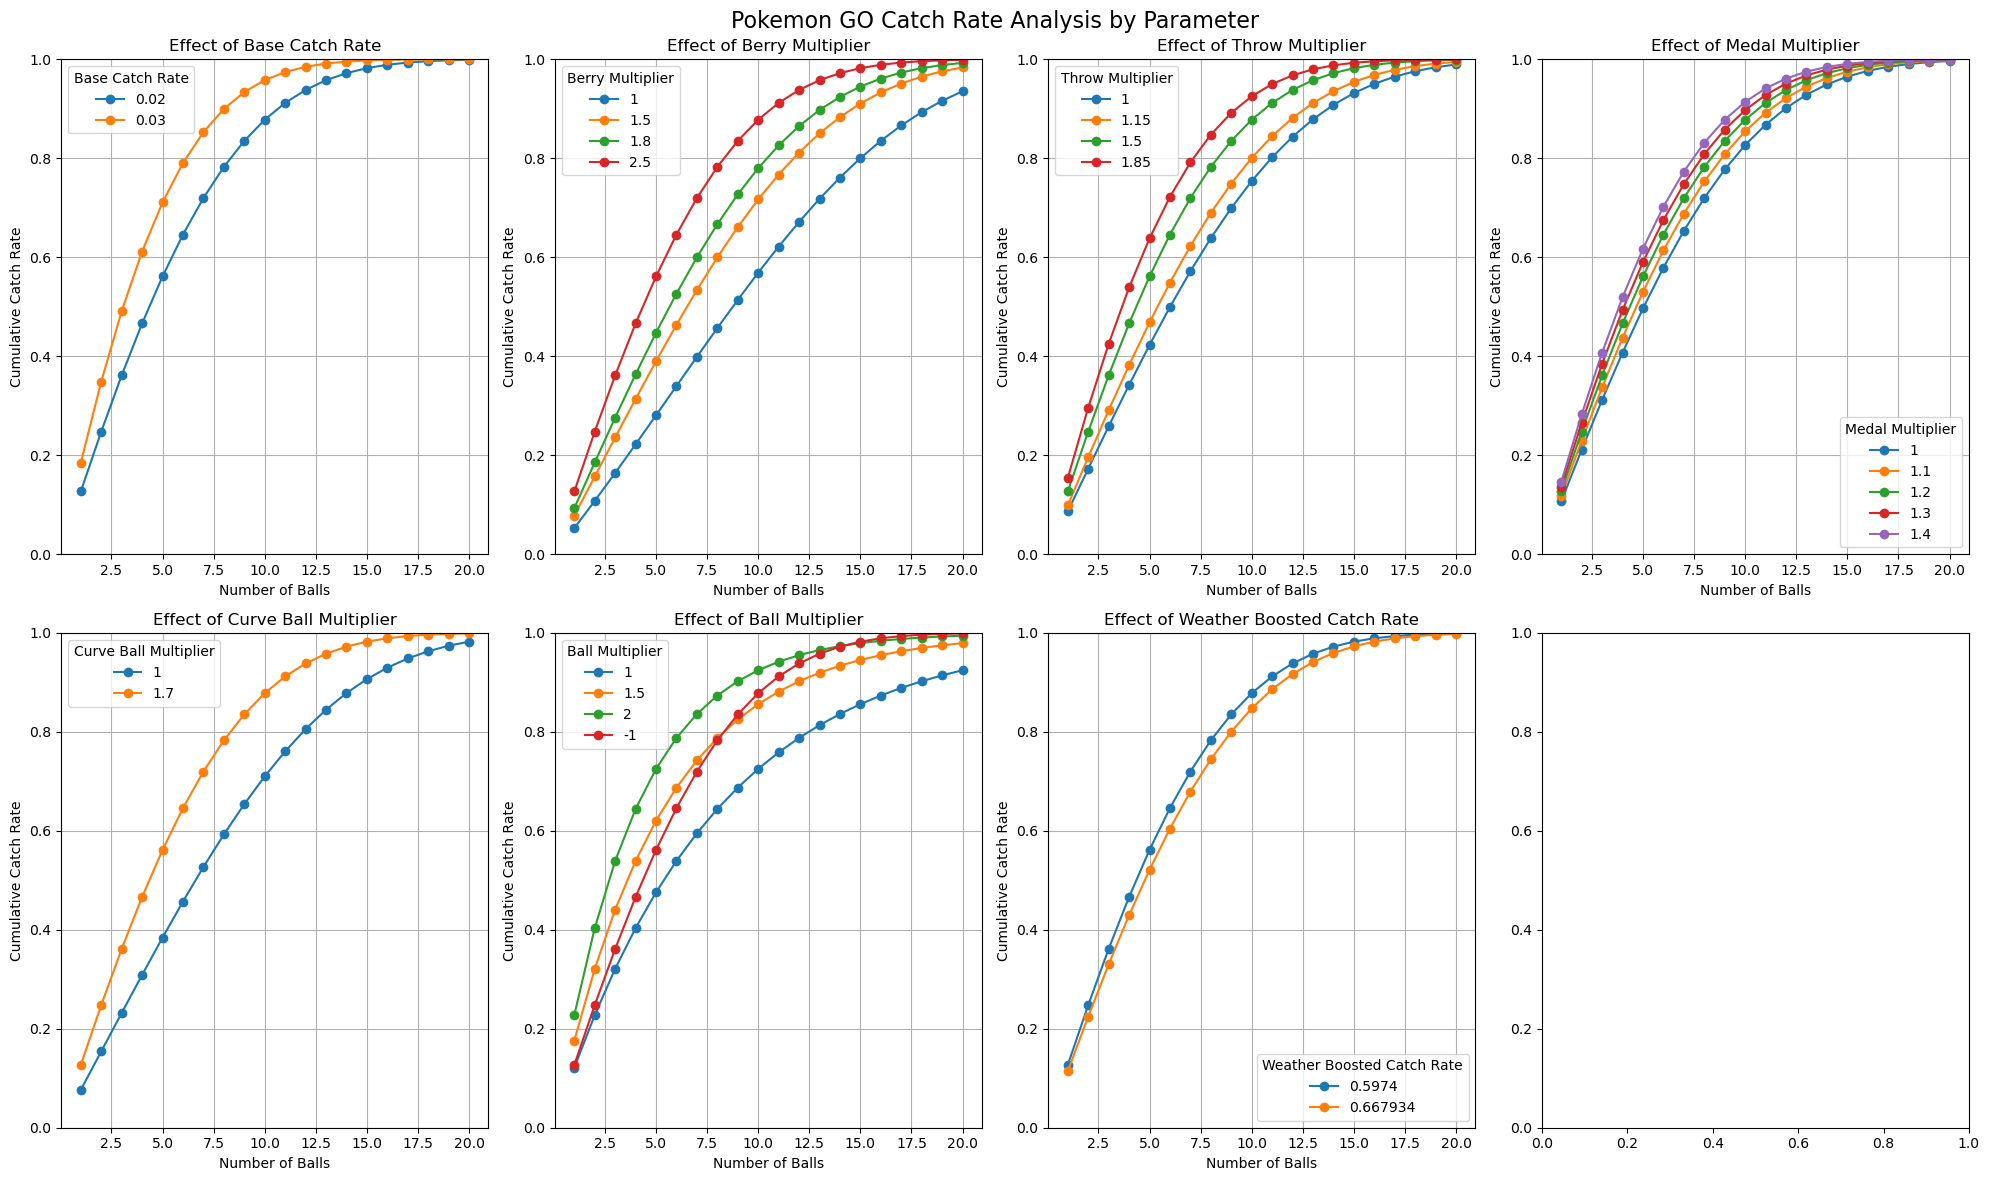

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking graphs
# plt.style.use('seaborn')
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Pokemon GO Catch Rate Analysis by Parameter', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Dictionary to map parameter names to more readable labels
param_labels = {
    'legendary': 'Base Catch Rate',
    'berry': 'Berry Multiplier',
    'throw': 'Throw Multiplier',
    'medal': 'Medal Multiplier',
    'curve': 'Curve Ball Multiplier',
    'ball': 'Ball Multiplier',
    'weather': 'Weather Boosted Catch Rate'
}

# Create a plot for each parameter
for idx, param in enumerate(['legendary', 'berry', 'throw', 'medal', 'curve', 'ball', 'weather']):
    # Filter data for this parameter
    param_data = catch_rate_df[catch_rate_df['Parameter'].str.startswith(f'Varying {param}')]

    # Create the plot
    for value in param_data['Parameter'].unique():
        value_data = param_data[param_data['Parameter'] == value]
        axes[idx].plot(value_data['Number of Balls'],
                      value_data['Cumulative Catch Rate'],
                      marker='o',
                      label=value.split(': ')[1])

    axes[idx].set_xlabel('Number of Balls')
    axes[idx].set_ylabel('Cumulative Catch Rate')
    axes[idx].set_title(f'Effect of {param_labels[param]}')
    axes[idx].grid(True)
    axes[idx].legend(title=param_labels[param])
    axes[idx].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Save the figure
# plt.savefig('pokemon_go_catch_rate_analysis.png', dpi=300, bbox_inches='tight')

In [35]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

custom_labels = {
    'legendary': {
        '0.02': 'Legendary',
        '0.03': 'Kanto Bird'
    },
    'weather': {
        '0.5974': 'Not Weather Boosted',
        '0.7974': 'Boosted'
    },
    'ball': {
        '1': 'Pokeball',
        '1.5': 'Great Ball',
        '2': 'Ultra Ball',
        '-1': 'Premier Ball'  # Note: This might need a different value if Premier Ball has different multiplier
    },
    'berry': {
        '1': 'No Berry',
        '1.5': 'Razz Berry',
        '1.8': 'Silver Pinap',
        '2.5': 'Golden Razz Berry'
    },
    'throw': {
        '1': 'Bad',
        '1.15': 'Nice',
        '1.5': 'Great',
        '1.85': 'Excellent'
    },
    'medal': {
        '1': 'None',
        '1.1': 'Bronze',
        '1.2': 'Silver',
        '1.3': 'Gold',
        '1.4': 'Platinum'
    },
    'curve': {
        '1': 'Straight',
        '1.7': 'Curve'
    }
}

def create_catch_rate_animation():
    # plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(12, 8))

    param_labels = {
        'berry': 'Berry Type',
        'throw': 'Throw Type',
        'curve': 'Throw Style',
        'medal': 'Medal Type',
        'legendary': 'Base Catch Rate',
        'ball': 'Ball Type'
    }

    # Calculate total frames including pauses
    frames_per_param = 25  # 20 balls + 5 frames pause (1.5 sec at 100ms interval)
    total_frames = len(param_labels) * frames_per_param

    def init():
        ax.clear()
        ax.set_xlim(1, 20)
        ax.set_ylim(0, 1)
        ax.grid(True)
        return []

    def animate(frame):
        ax.clear()

        # Add highlighted region first (before plotting lines)
        ax.axvspan(12, 16, color='yellow', alpha=0.3, zorder=1)

        # Calculate current parameter and number of balls
        param_idx = frame // frames_per_param
        frame_within_param = frame % frames_per_param

        # If we're in the pause frames, keep showing 20 balls
        num_balls = min(20, frame_within_param + 1)

        current_param = list(param_labels.keys())[param_idx]

        # Filter data for current parameter
        param_data = catch_rate_df[catch_rate_df['Parameter'].str.startswith(f'Varying {current_param}')]

        # Plot each line up to the current number of balls
        for value in param_data['Parameter'].unique():
            value_data = param_data[param_data['Parameter'] == value]
            value_data = value_data[value_data['Number of Balls'] <= num_balls]

            # Extract the numerical value from the parameter
            param_value = value.split(': ')[1]

            # Get custom label for this value
            custom_label = custom_labels[current_param].get(param_value, param_value)

            ax.plot(value_data['Number of Balls'],
                   value_data['Cumulative Catch Rate'],
                   marker='o',
                   label=custom_label)

        ax.set_xlabel('Number of Balls')
        ax.set_ylabel('Cumulative Catch Rate')
        ax.set_title(f'Effect of {param_labels[current_param]} (Balls: {num_balls})')
        ax.grid(True)

        ax.set_xticks(range(0, 21, 4))

        # Set y-axis ticks at intervals of 0.1
        ax.set_yticks([i/10 for i in range(11)])  # 0.0 to 1.0 by 0.1
        ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # Format as 0.1 instead of 0.100000


        # Position legend at bottom right
        ax.legend(
            title=param_labels[current_param],
            bbox_to_anchor=(1.02, 0),
            loc='lower left',
            borderaxespad=0,
            bbox_transform=ax.transAxes
        )

        ax.set_xlim(1, 20)
        ax.set_ylim(0, 1)

        plt.tight_layout()

        return ax.get_children()

    # Create animation with modified frame count
    anim = animation.FuncAnimation(
        fig,
        animate,
        init_func=init,
        frames=total_frames,  # Updated total frames
        interval=100,         # 100ms between frames
        blit=True,
        repeat=True
    )

    # Save animation
    anim.save('catch_rate_animation.gif',
              writer='pillow',
            #   bbox_inches='tight',
              dpi=100)

    plt.close()

    return anim

# Create and display the animation
animation = create_catch_rate_animation()